In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns

In [17]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
df=pd.read_csv('letter-recognition.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [6]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
mlp=MLPClassifier(hidden_layer_sizes=(128,64),max_iter=100,activation='relu',random_state=42)

In [8]:
mlp.fit(x_train,y_train)

c:\Users\piyus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42)

In [27]:
predications=mlp.predict(x_test)

In [28]:
print("Accuarcy ",accuracy_score(y_test,predications))

Accuarcy  0.95625


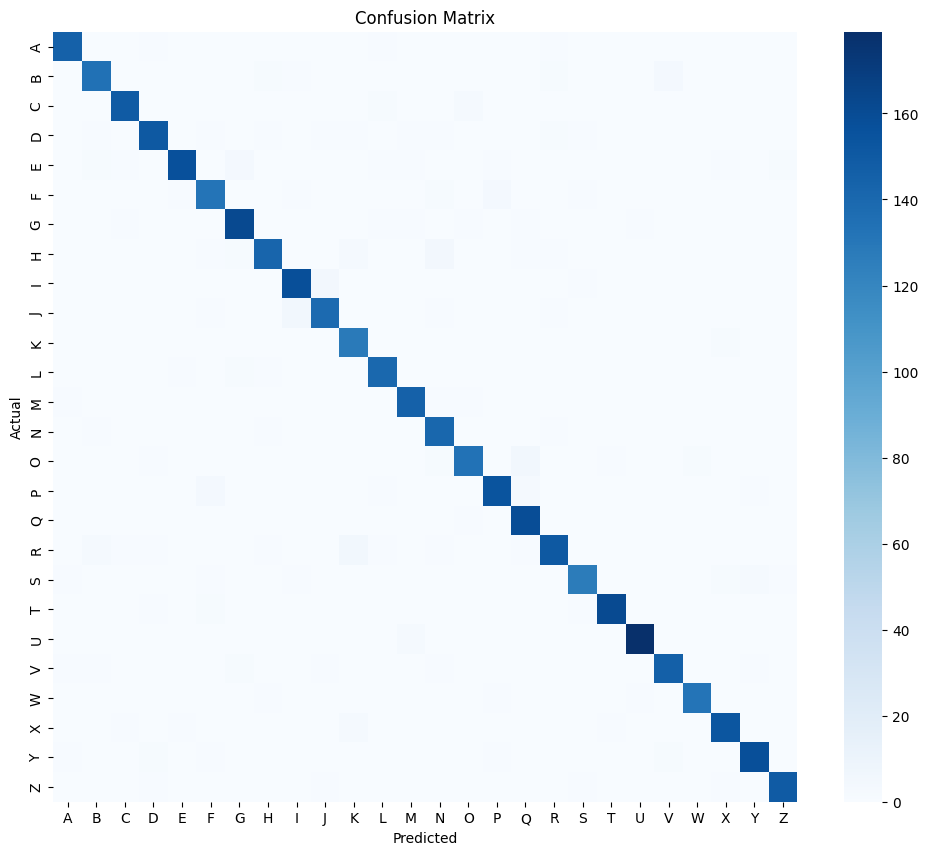

In [29]:
cm = confusion_matrix(y_test, predications)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), yticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
cm

array([[145,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 134,   0,   0,   0,   0,   0,   2,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   4,   0,   0,   0,   0],
       [  0,   0, 149,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 151,   0,   1,   0,   1,   0,   1,   1,   0,   1,
          1,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   1,   0, 157,   0,   4,   0,   0,   0,   0,   1,   1,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   2],
       [  0,   0,   0,   0,   1, 132,   0,   0,   1,   0,   0,   0,   0,
          2,   0,   4,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0, 162,   0,   0,   0,   0,   1,   1,
          0,   1,   0,   1,   0,   0,   0,   